# Loudoun County Growth Study

# Project Overview
Loudoun County Growth Study
Purpose: To analyze various economic, demographic, and housing characteristics.

### Import Libraries



In [1]:
# Import required libraries
import os
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  
import itertools
import matplotlib.ticker as ticker
import matplotlib.cm as cm
from matplotlib import cm
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Set default Seaborn style
sns.set(style="whitegrid")

# Suppress all warnings
warnings.filterwarnings("ignore")

### Define File Paths

In [2]:
# Defining file paths for all datasets
file_paths = {
    "Income": "C:/Users/AKKem/OneDrive/Desktop/Data Analysis Modules/Projects/Loudoun_Growth_Study/data/Combined_B19013.csv",
    "Housing_Costs": "C:/Users/AKKem/OneDrive/Desktop/Data Analysis Modules/Projects/Loudoun_Growth_Study/data/Combined_B25077.csv",
    "Labor_Stats": "C:/Users/AKKem/OneDrive/Desktop/Data Analysis Modules/Projects/Loudoun_Growth_Study/data/Combined_BLS_Data.csv",
    "Population_Characteristics": "C:/Users/AKKem/OneDrive/Desktop/Data Analysis Modules/Projects/Loudoun_Growth_Study/data/Combined_DP05.csv",
    "GDP": "C:/Users/AKKem/OneDrive/Desktop/Data Analysis Modules/Projects/Loudoun_Growth_Study/data/Combined_GDP_Data.csv",
    "Economic_Data": "C:/Users/AKKem/OneDrive/Desktop/Data Analysis Modules/Projects/Loudoun_Growth_Study/data/EC1700BASIC.csv"
}

### Load Data

In [3]:
# Function to load datasets
def load_datasets(file_paths):
    dataframes = {}
    for name, path in file_paths.items():
        try:
            # Changed encoding to 'utf-8-sig' to handle BOM and special characters
            df = pd.read_csv(path, encoding='utf-8-sig')
            dataframes[name] = df
        except Exception as e:
            print(f"Error loading {name}: {e}")
    return dataframes

# Load all datasets into a dictionary of DataFrames
dataframes = load_datasets(file_paths)

### Inspect Data

In [4]:
# Display columns of each DataFrame
for name, df in dataframes.items():
    print(f"Columns in {name}:")
    print(df.columns)
    print()

Columns in Income:
Index(['ÃYear', 'Santa_Clara_County_California', 'Montgomery_County_Maryland',
       'Wake_County_North_Carolina', 'Davidson_County_Tennessee',
       'Dallas_County_Texas', 'Fairfax_County_Virginia',
       'Loudoun_County_Virginia'],
      dtype='object')

Columns in Housing_Costs:
Index(['ÃYear', 'County', 'Median_Value_dollars'], dtype='object')

Columns in Labor_Stats:
Index(['area_fips', 'own_code', 'Industry_Code', 'agglvl_code', 'year', 'qtr',
       'annual_avg_estabs', 'annual_avg_emplvl', 'total_annual_wages',
       'avg_annual_pay'],
      dtype='object')

Columns in Population_Characteristics:
Index(['ÃYear', 'Label', 'Santa_Clara_County_California',
       'Montgomery_County_Maryland', 'Wake_County_North_Carolina',
       'Davidson_County_Tennessee', 'Dallas_County_Texas',
       'Fairfax_County_Virginia', 'Loudoun_County_Virginia'],
      dtype='object')

Columns in GDP:
Index(['FIPS_Code', 'County_Name', 'Year',
       'Chaintype_quantity_indexes_fo

### Data Cleaning
- Define Cleaning Function
- Apply Cleaning to All DataFrames

In [5]:
# Function to clean column names and dataset values with .loc assignments
# Define a thorough cleaning function
def clean_dataset(df):
    """
    Cleans a DataFrame by:
    - Standardizing column names
    - Handling missing data
    - Converting data types
    - Removing duplicates
    - Trimming whitespace
    
    Parameters:
        df (pd.DataFrame): The DataFrame to clean.

    Returns:
        pd.DataFrame: The cleaned DataFrame.
    """
    # Standardize column names
    df.columns = (
        df.columns.str.strip()
        .str.replace("Ã", "", regex=False)
        .str.replace("[\W]+", "_", regex=True)  # Replace non-alphanumeric characters with underscores
        .str.lower()
    )

    # Strip whitespace from all string entries in the DataFrame
    for col in df.select_dtypes(include=["object"]).columns:
        df[col] = df[col].str.strip()

    # Remove duplicate rows
    df = df.drop_duplicates()

    # Handle missing values (general placeholder)
    df = df.fillna(value="NA")

    # Convert numeric columns to proper format (remove non-numeric symbols first)
    for col in df.select_dtypes(include=["object"]).columns:
        try:
            df[col] = df[col].str.replace(",", "", regex=True)
            df[col] = pd.to_numeric(df[col], errors="ignore")
        except Exception as e:
            print(f"Error converting column {col} to numeric: {e}")

    # Specific cleaning adjustments (if needed for datasets)
    if 'year' in df.columns:
        df['year'] = pd.to_numeric(df['year'], errors='coerce')

    return df

# Apply the clean_dataset function to all DataFrames
cleaned_dataframes = {name: clean_dataset(df) for name, df in dataframes.items()}

### Saved Cleaned Data

In [6]:
#Save Cleaned Data
cleaned_dir = r"C:\Users\AKKem\OneDrive\Desktop\Data Analysis Modules\Projects\Loudoun_Growth_Study\data_cleaned"
os.makedirs(cleaned_dir, exist_ok=True)

# Save cleaned DataFrames
cleaned_file_paths = {}
for name, df in dataframes.items():
    cleaned_path = os.path.join(cleaned_dir, os.path.basename(file_paths[name]))
    df.to_csv(cleaned_path, index=False, encoding="utf-8")
    cleaned_file_paths[name] = cleaned_path

### Reload Cleaned Data

In [7]:
# Reload cleaned datasets
cleaned_dataframes = {}
for name, path in cleaned_file_paths.items():
    try:
        df = pd.read_csv(path, encoding='utf-8-sig')
        cleaned_dataframes[name] = df
    except Exception as e:
        print(f"Error loading cleaned data for {name}: {e}")

In [8]:
# Display columns of each DataFrame
for name, df in cleaned_dataframes.items():
    print(f"Columns in {name}:")
    print(df.columns)
    print()

Columns in Income:
Index(['year', 'santa_clara_county_california', 'montgomery_county_maryland',
       'wake_county_north_carolina', 'davidson_county_tennessee',
       'dallas_county_texas', 'fairfax_county_virginia',
       'loudoun_county_virginia'],
      dtype='object')

Columns in Housing_Costs:
Index(['year', 'county', 'median_value_dollars'], dtype='object')

Columns in Labor_Stats:
Index(['area_fips', 'own_code', 'industry_code', 'agglvl_code', 'year', 'qtr',
       'annual_avg_estabs', 'annual_avg_emplvl', 'total_annual_wages',
       'avg_annual_pay'],
      dtype='object')

Columns in Population_Characteristics:
Index(['year', 'label', 'santa_clara_county_california',
       'montgomery_county_maryland', 'wake_county_north_carolina',
       'davidson_county_tennessee', 'dallas_county_texas',
       'fairfax_county_virginia', 'loudoun_county_virginia'],
      dtype='object')

Columns in GDP:
Index(['fips_code', 'county_name', 'year',
       'chaintype_quantity_indexes_for_r

# Part 1: Loudoun County Analysis


### GDP Analysis

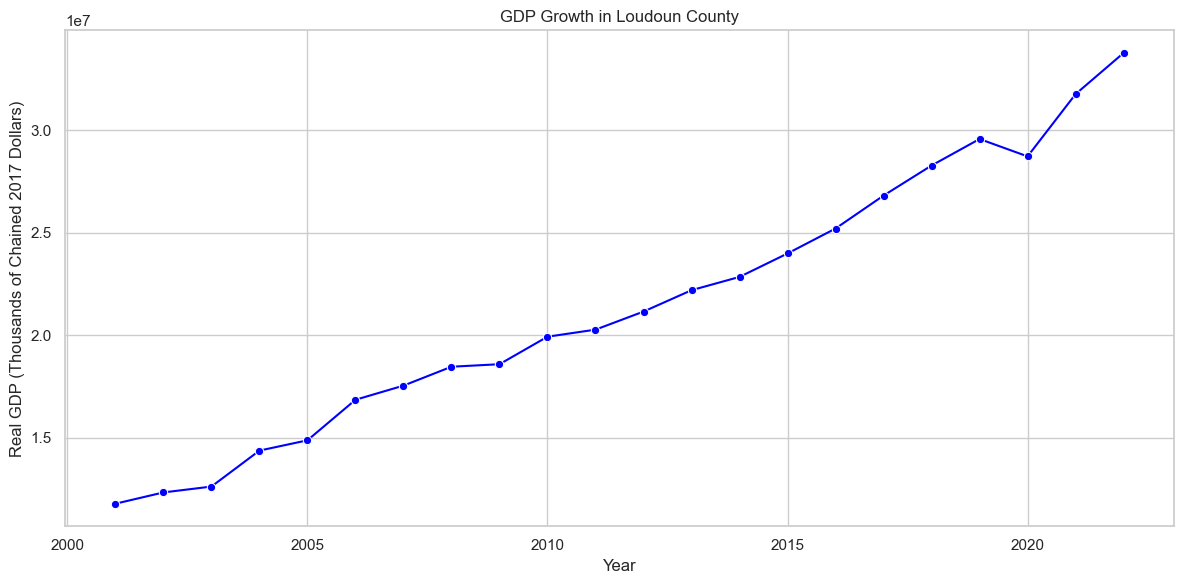

In [9]:
# Use cleaned GDP data
gdp_data = cleaned_dataframes["GDP"]

# Clean column names
gdp_data.columns = gdp_data.columns.str.strip()

# Rename columns if necessary
if "real_gdp_thousands_of_chained_2017_dollars" in gdp_data.columns:
    gdp_data = gdp_data.rename(columns={"real_gdp_thousands_of_chained_2017_dollars": "real_gdp"})

# Filter for Loudoun County
loudoun_gdp = gdp_data[gdp_data["county_name"] == "Loudoun, VA"].copy()

# Ensure the Real_GDP column is numeric
loudoun_gdp["real_gdp"] = pd.to_numeric(loudoun_gdp["real_gdp"], errors="coerce")

# Summarize GDP growth by year
gdp_growth = loudoun_gdp[["year", "real_gdp"]].sort_values("year")

# Plot GDP growth
plt.figure(figsize=(12, 6))
sns.lineplot(data=gdp_growth, x="year", y="real_gdp", marker='o', color='blue')
plt.title("GDP Growth in Loudoun County")
plt.xlabel("Year")
plt.ylabel("Real GDP (Thousands of Chained 2017 Dollars)")
plt.grid(True)
plt.tight_layout()
plt.show()

### Employment by Industry 

<Figure size 1400x800 with 0 Axes>

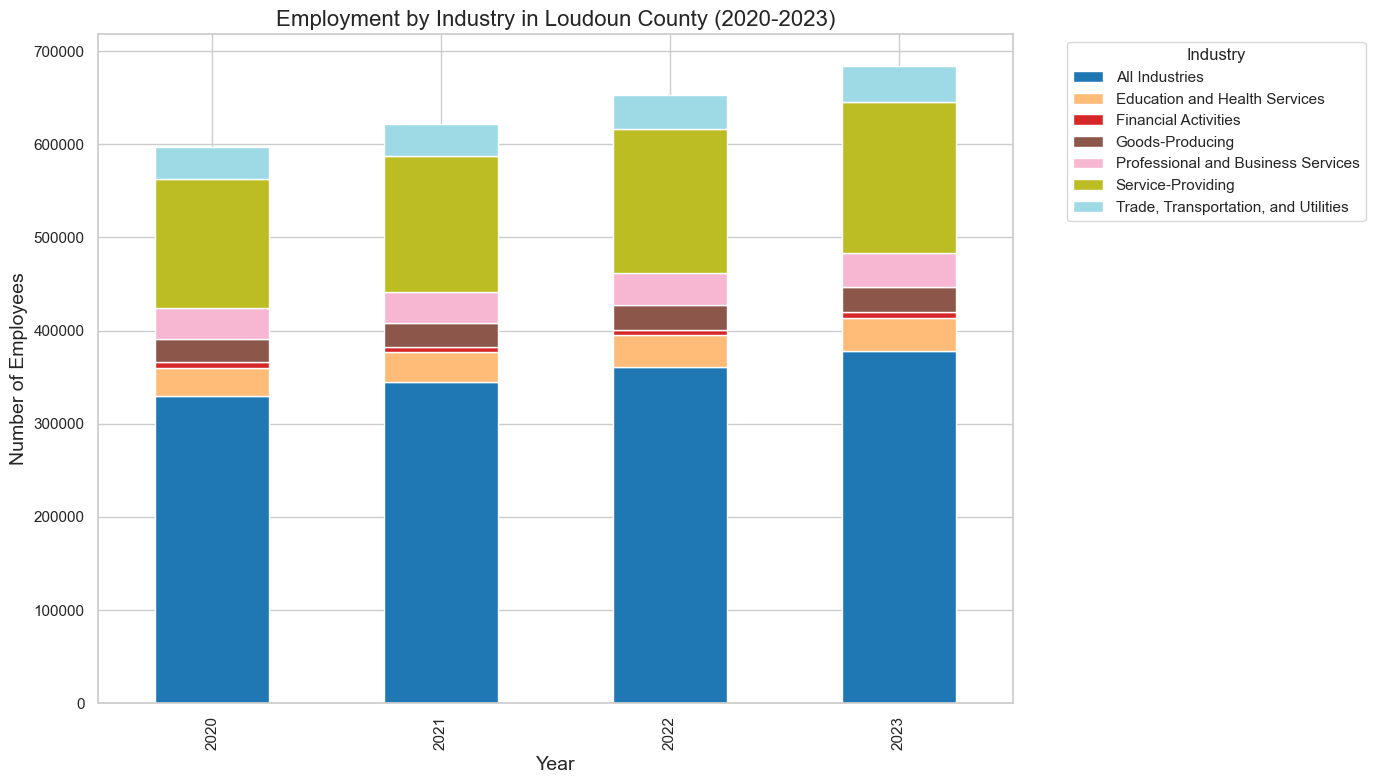

In [10]:
# Employment by Industry in Loudoun County (2020-2023)

# Load the labor stats dataset
labor_stats_df = cleaned_dataframes["Labor_Stats"]

# Define the mapping for Industry_Code to Industry_Name
industry_mapping = {
    "10": "All Industries",
    "101": "Goods-Producing",
    "102": "Service-Providing",
    "1011": "Natural Resources and Mining",
    "1012": "Construction",
    "1013": "Manufacturing",
    "1021": "Trade, Transportation, and Utilities",
    "1022": "Information",
    "1023": "Financial Activities",
    "1024": "Professional and Business Services",
    "1025": "Education and Health Services",
    "1026": "Leisure and Hospitality",
    "1027": "Other Services",
    "1028": "Public Administration",
}

# Map Industry_Code to Industry_Name and filter for Loudoun County (FIPS: 51107)
loudoun_bls_data = (
    labor_stats_df.assign(
        industry_name=labor_stats_df["industry_code"].astype(str).map(industry_mapping)
    )
    .loc[
        labor_stats_df["area_fips"] == 51107,  # Filter for Loudoun County
        ["year", "industry_name", "annual_avg_emplvl"],
    ]
    .dropna(subset=["industry_name", "annual_avg_emplvl"])  # Drop invalid rows
)

# Convert employment levels to numeric
loudoun_bls_data["annual_avg_emplvl"] = pd.to_numeric(
    loudoun_bls_data["annual_avg_emplvl"], errors="coerce"
)

# Group by year and industry name, and calculate employment counts
employment_by_year = (
    loudoun_bls_data.groupby(["year", "industry_name"])["annual_avg_emplvl"]
    .sum()
    .reset_index()
    .rename(columns={"annual_avg_emplvl": "employment_count"})
)

# Pivot data for plotting
employment_pivot = employment_by_year.pivot(
    index="year", columns="industry_name", values="employment_count"
).fillna(0)

# Generate a colormap with distinct colors for each industry
colors = plt.colormaps["tab20"](np.linspace(0, 1, len(employment_pivot.columns)))

# Plot the stacked bar chart
plt.figure(figsize=(14, 8))
employment_pivot.plot(kind="bar", stacked=True, figsize=(14, 8), color=colors)
plt.title("Employment by Industry in Loudoun County (2020-2023)", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Number of Employees", fontsize=14)
plt.legend(title="Industry", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()


### Median Housing Costs Over Time

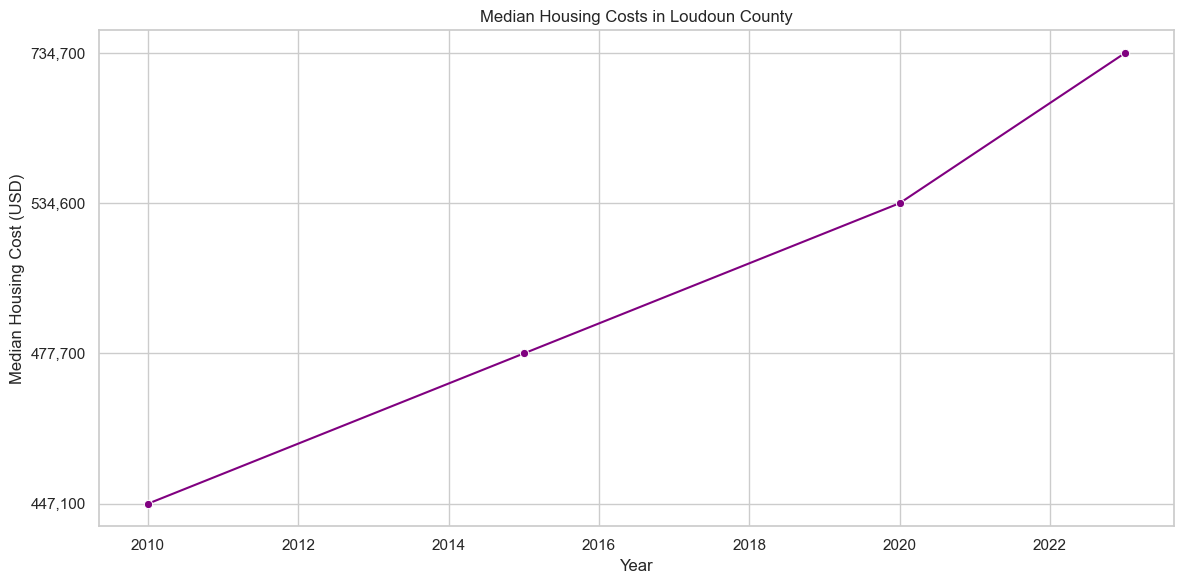

In [16]:
# Housing Costs Visualization
housing_costs = cleaned_dataframes["Housing_Costs"]

# Filter for Loudoun County
loudoun_housing_costs = housing_costs[housing_costs["county"] == "Loudoun County, Virginia"]

# Plot Median Housing Costs
plt.figure(figsize=(12, 6))
sns.lineplot(data=loudoun_housing_costs, x="year", y="median_value_dollars", marker='o', color='purple')
plt.title("Median Housing Costs in Loudoun County")
plt.xlabel("Year")
plt.ylabel("Median Housing Cost (USD)")
plt.gca().invert_yaxis()  # Flip the Y-axis
plt.grid(True)
plt.tight_layout()
plt.show()


### Population Growth



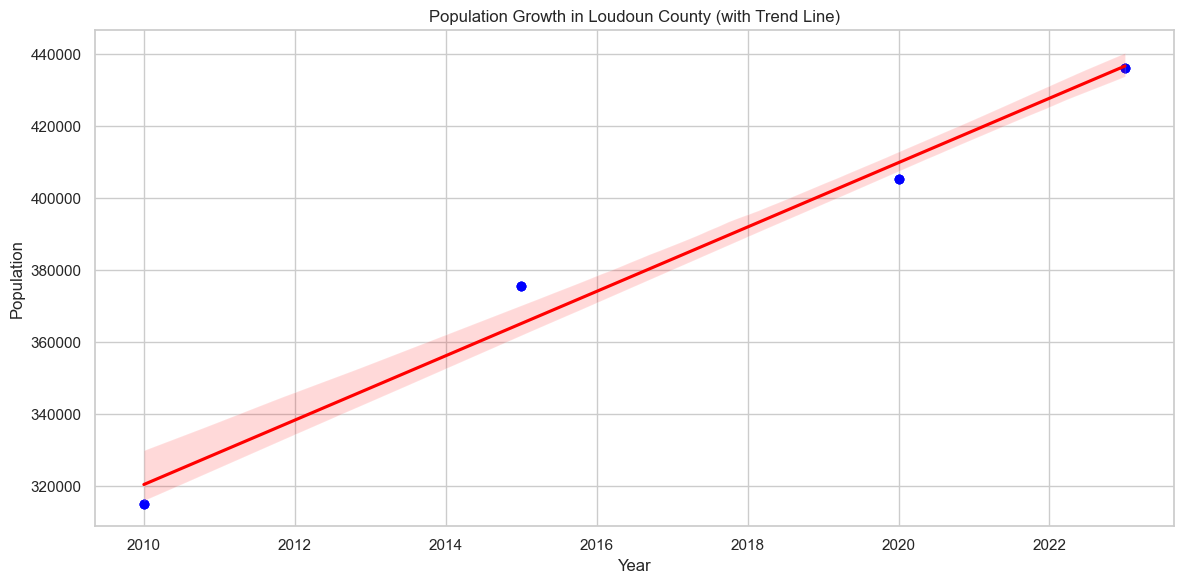

In [23]:
# Use cleaned Population Characteristics data
population_characteristics = cleaned_dataframes["Population_Characteristics"]

# Filter for "Total population" and extract necessary columns
population_growth = population_characteristics[
    population_characteristics["label"].str.lower() == "total population"
][["year", "loudoun_county_virginia"]].rename(columns={"loudoun_county_virginia": "population"})

# Convert 'population' column to numeric
population_growth["population"] = population_growth["population"].str.replace(",", "", regex=True).astype(float)

# Plot Population Growth with Trend Line
plt.figure(figsize=(12, 6))
sns.regplot(
    x=population_growth["year"],
    y=population_growth["population"],
    scatter_kws={"color": "blue"},
    line_kws={"color": "red"},
)
plt.title("Population Growth in Loudoun County (with Trend Line)")
plt.xlabel("Year")
plt.ylabel("Population")
plt.grid(True)
plt.tight_layout()
plt.show()



### Number of Businesses

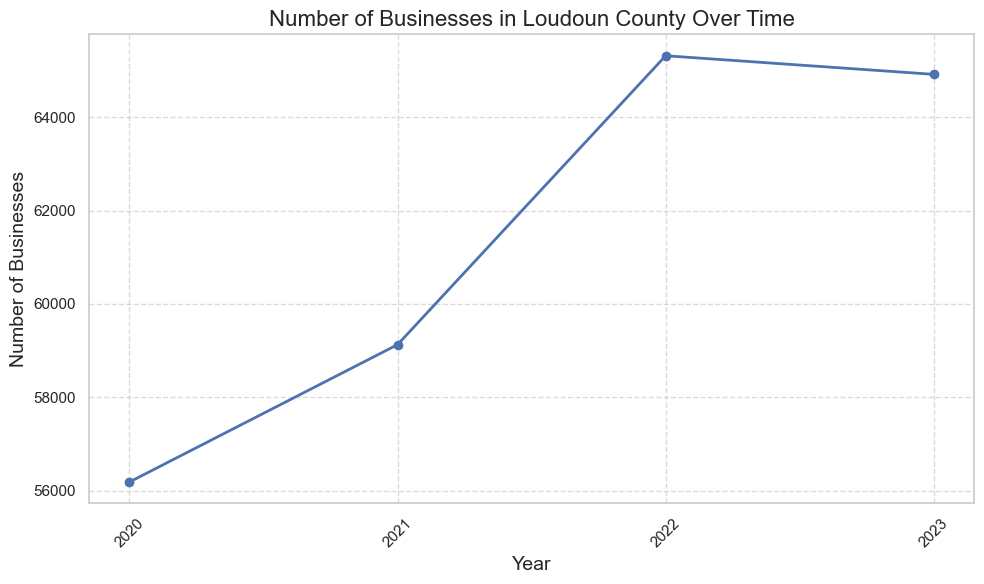

In [27]:
# Number of Businesses in Loudoun County Over Time

# Filter for Loudoun County (FIPS code 51107)
loudoun_bls_data = labor_stats_df[labor_stats_df["area_fips"] == 51107]

# Group data to calculate the number of businesses (annual_avg_estabs)
business_trend = (
    loudoun_bls_data.groupby("year", as_index=False)["annual_avg_estabs"]
    .sum()
    .rename(columns={"annual_avg_estabs": "number_of_businesses"})
)

# Plot the trend of businesses over time
plt.figure(figsize=(10, 6))
plt.plot(
    business_trend["year"],
    business_trend["number_of_businesses"],
    marker="o",
    linestyle="-",
    linewidth=2,
)
plt.title("Number of Businesses in Loudoun County Over Time", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Number of Businesses", fontsize=14)
plt.grid(True, linestyle="--", alpha=0.7)

# Set x-ticks to display integer years
plt.xticks(ticks=business_trend["year"], rotation=45)

plt.tight_layout()
plt.show()


### Cost of Labor in Loudoun County Over Time

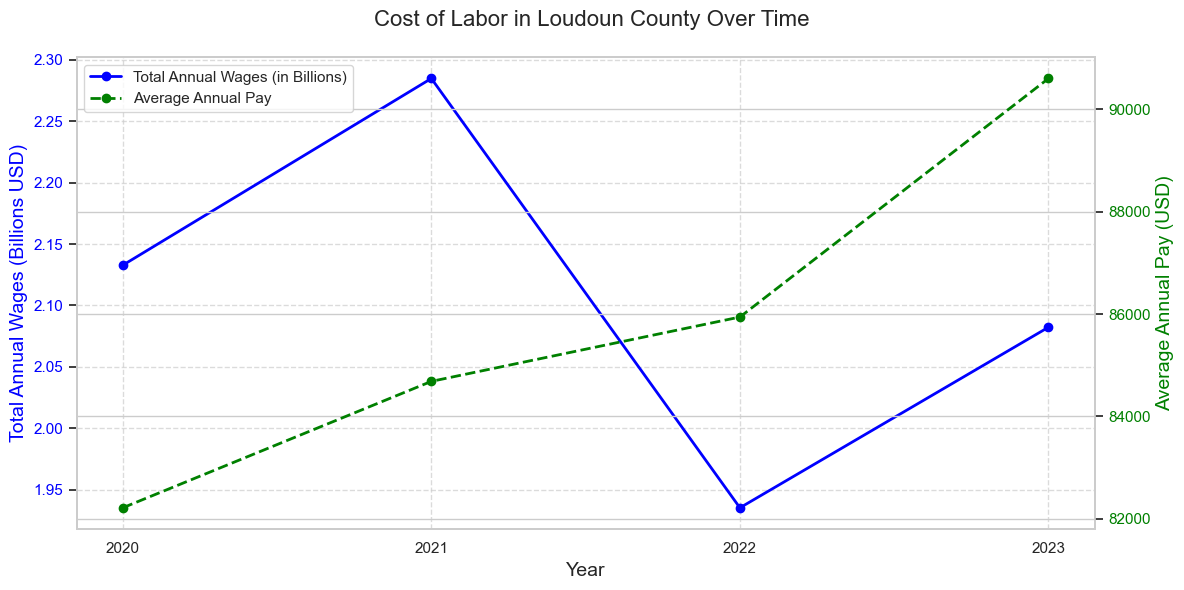

In [29]:
# Load the dataset
combined_bls_data = cleaned_dataframes["Labor_Stats"]

# Filter the dataset for Loudoun County (area_fips = 51107)
loudoun_bls_data = combined_bls_data[combined_bls_data["area_fips"] == 51107].copy()

# Ensure total_annual_wages and avg_annual_pay are numeric
loudoun_bls_data["total_annual_wages"] = pd.to_numeric(
    loudoun_bls_data["total_annual_wages"], errors="coerce"
)
loudoun_bls_data["avg_annual_pay"] = pd.to_numeric(
    loudoun_bls_data["avg_annual_pay"], errors="coerce"
)

# Filter valid rows for total_annual_wages and avg_annual_pay
loudoun_bls_data = loudoun_bls_data[
    (loudoun_bls_data["total_annual_wages"] > 0) & (loudoun_bls_data["avg_annual_pay"] > 0)
]

# Aggregate data by year to calculate trends for total wages and average pay
labor_cost_trend = (
    loudoun_bls_data.groupby("year", as_index=False)[["total_annual_wages", "avg_annual_pay"]]
    .mean(numeric_only=True)
    .rename(columns={"total_annual_wages": "Total Annual Wages", "avg_annual_pay": "Average Annual Pay"})
)

# Plot cost of labor trends over time
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot total annual wages on primary y-axis
ax1.plot(
    labor_cost_trend["year"],
    labor_cost_trend["Total Annual Wages"] / 1e9,  # Convert to billions
    marker="o",
    linestyle="-",
    linewidth=2,
    color="blue",
    label="Total Annual Wages (in Billions)",
)
ax1.set_xlabel("Year", fontsize=14)
ax1.set_ylabel("Total Annual Wages (Billions USD)", fontsize=14, color="blue")
ax1.tick_params(axis="y", labelcolor="blue")
ax1.grid(True, linestyle="--", alpha=0.7)

# Create a secondary y-axis for average annual pay
ax2 = ax1.twinx()
ax2.plot(
    labor_cost_trend["year"],
    labor_cost_trend["Average Annual Pay"],
    marker="o",
    linestyle="--",
    color="green",
    linewidth=2,
    label="Average Annual Pay",
)
ax2.set_ylabel("Average Annual Pay (USD)", fontsize=14, color="green")
ax2.tick_params(axis="y", labelcolor="green")

# Add a legend to clarify both lines
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax2.legend(lines_1 + lines_2, labels_1 + labels_2, loc="upper left")

# Add title and adjust layout
fig.suptitle("Cost of Labor in Loudoun County Over Time", fontsize=16)
fig.tight_layout()

# Set x-ticks to display integer years
plt.xticks(ticks=labor_cost_trend["year"], rotation=45)

plt.show()


### Median Household Income in Loudoun County Over Time 

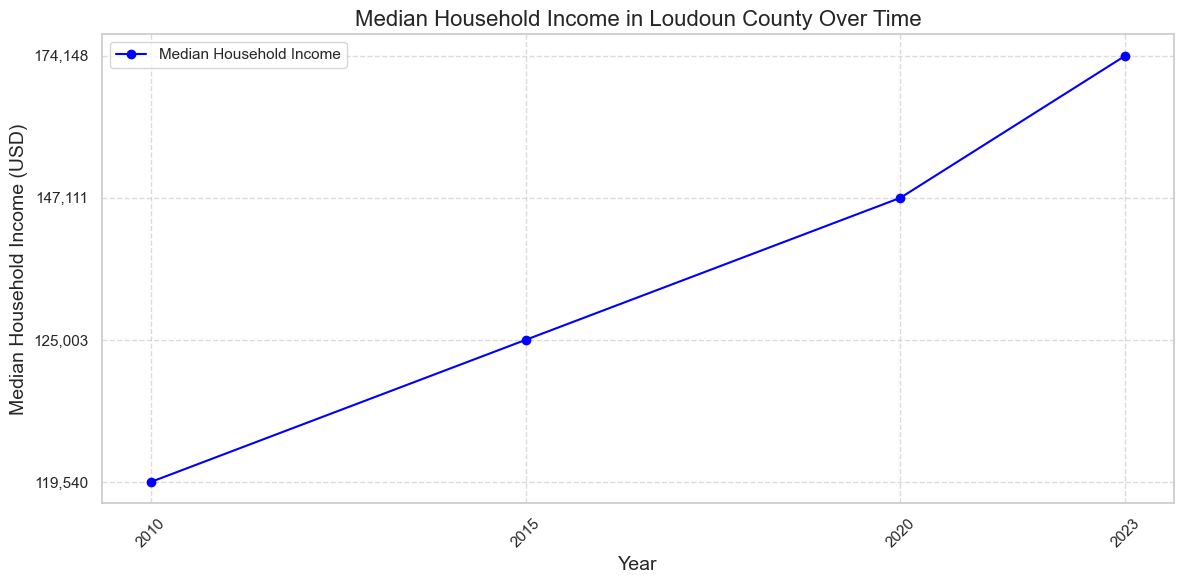

In [30]:
# Load the cleaned Income data
income_data = cleaned_dataframes["Income"]

# Ensure 'year' and 'loudoun_county_virginia' columns exist
if {"year", "loudoun_county_virginia"}.issubset(income_data.columns):
    # Select relevant columns for Loudoun County
    loudoun_income = income_data[["year", "loudoun_county_virginia"]]

    # Sort by year
    loudoun_income = loudoun_income.sort_values(by="year")

    # Plot Median Income Over Time
    plt.figure(figsize=(12, 6))
    plt.plot(
        loudoun_income["year"],
        loudoun_income["loudoun_county_virginia"],
        marker="o",
        linestyle="-",
        color="blue",
        label="Median Household Income",
    )
    plt.title("Median Household Income in Loudoun County Over Time", fontsize=16)
    plt.xlabel("Year", fontsize=14)
    plt.ylabel("Median Household Income (USD)", fontsize=14)
    plt.grid(True, linestyle="--", alpha=0.7)
    plt.xticks(loudoun_income["year"], rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()
else:
    print("Required columns for 'year' or 'loudoun_county_virginia' are missing.")


# Part 2: Comparison of Key Economic Characteristics of Loudoun County with Peer Counties

### Median Household Income by County

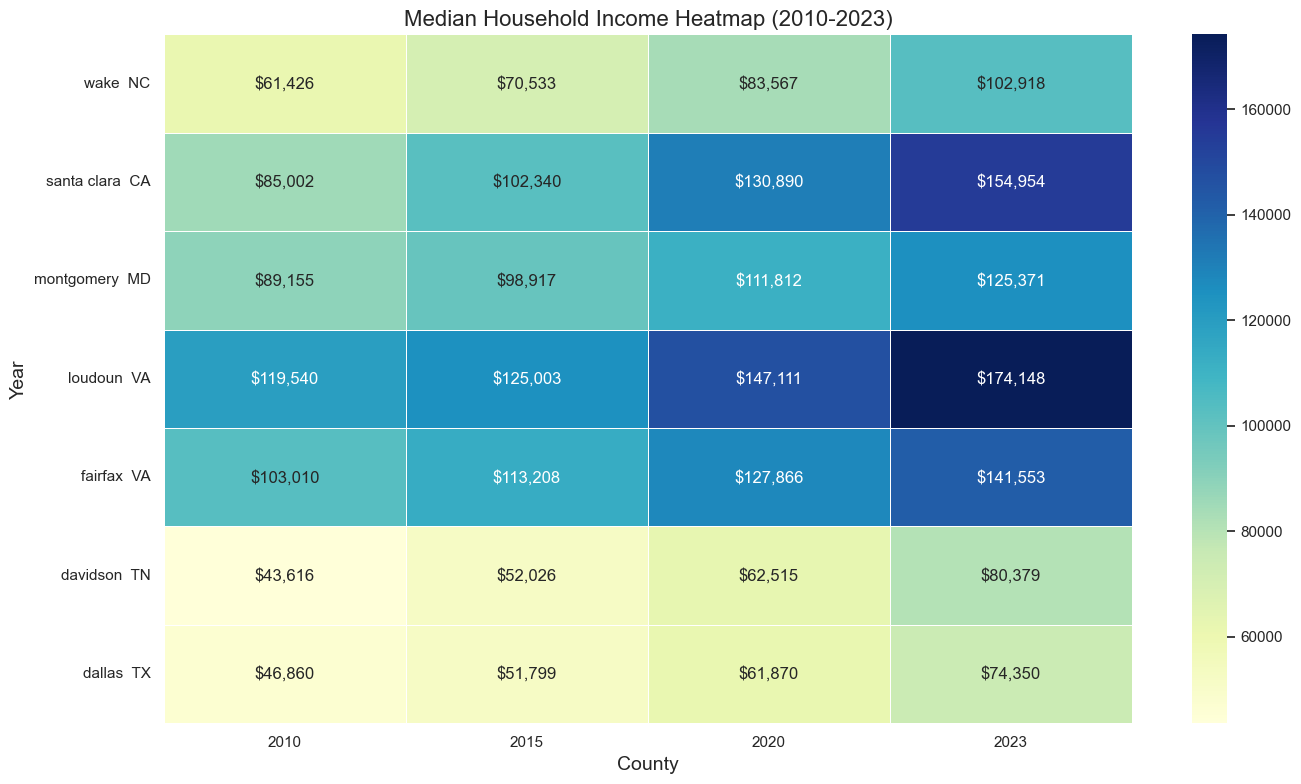

In [31]:
# Define the counties of interest
counties_of_interest = [
    "loudoun_county_virginia",
    "fairfax_county_virginia",
    "montgomery_county_maryland",
    "santa_clara_county_california",
    "dallas_county_texas",
    "davidson_county_tennessee",
    "wake_county_north_carolina"
]

# Select and reshape data
selected_data = income_data[["year"] + counties_of_interest]
income_long = selected_data.melt(id_vars="year", var_name="county", value_name="median_household_income")

# Format county names
income_long["county"] = (
    income_long["county"]
    .str.replace("_", " ")
    .str.replace("county", "", case=False)
    .str.replace("virginia", "VA", case=False)
    .str.replace("maryland", "MD", case=False)
    .str.replace("california", "CA", case=False)
    .str.replace("texas", "TX", case=False)
    .str.replace("tennessee", "TN", case=False)
    .str.replace("north carolina", "NC", case=False)
    .str.strip()
)

# Ensure median_household_income is numeric
income_long["median_household_income"] = pd.to_numeric(
    income_long["median_household_income"].str.replace(",", "", regex=True), errors="coerce"
)

# Pivot the data
income_pivot = income_long.pivot(index="county", columns="year", values="median_household_income")

# Reverse the order of rows to have the latest year on top
income_pivot = income_pivot.iloc[::-1]

# Plotting the heatmap with currency formatting
plt.figure(figsize=(14, 8))
ax = sns.heatmap(income_pivot, annot=True, fmt=",.0f", cmap="YlGnBu", linewidths=0.5)

# Format the annotations as currency
for text in ax.texts:
    value = text.get_text().replace(",", "")  # Remove commas
    text.set_text(f'${float(value):,.0f}')

# Title and labels
plt.title("Median Household Income Heatmap (2010-2023)", fontsize=16)
plt.xlabel("County", fontsize=14)
plt.ylabel("Year", fontsize=14)
plt.tight_layout()
plt.show()


### Employment Trends by County

In [39]:
cleaned_dataframes["Labor_Stats"].columns
cleaned_dataframes["Labor_Stats"].head()

,area_fips,own_code,industry_code,agglvl_code,year,qtr,annual_avg_estabs,annual_avg_emplvl,total_annual_wages,avg_annual_pay
0,48113,0,10,70,2020,A,81171,1667356,125000000000.00,75038.00
1,48113,1,10,71,2020,A,167,26129,2365181145.00,90520.00
2,48113,1,101,72,2020,A,1,6,559565.00,91983.00
3,48113,1,102,72,2020,A,166,26123,2364621580.00,90520.00
4,48113,1,1021,73,2020,A,69,8186,590807483.00,72169.00


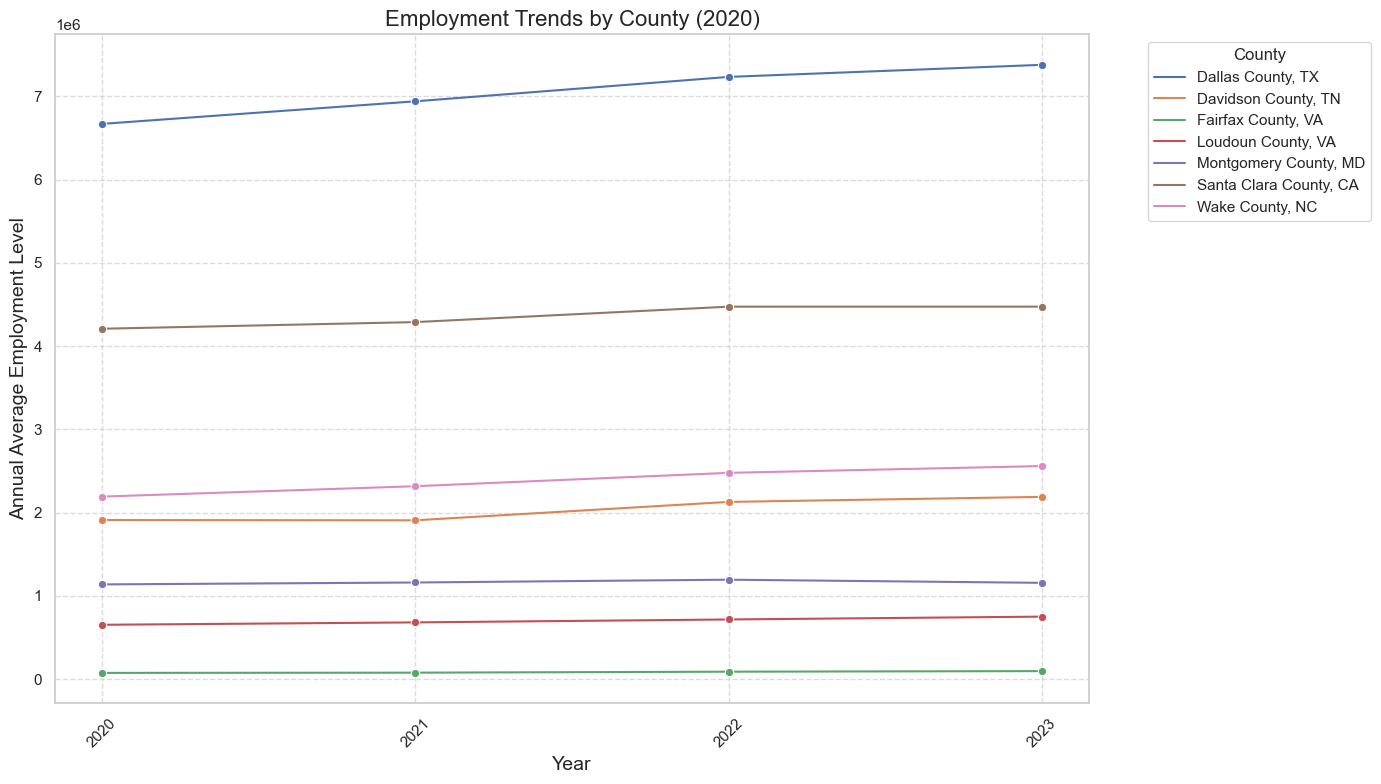

In [45]:
# Load the dataset
employment_data = cleaned_dataframes["Labor_Stats"]

# Filter for the selected FIPS codes
selected_fips = {
    "51107": "Loudoun County, VA",
    "51600": "Fairfax County, VA",
    "24033": "Montgomery County, MD",
    "6085": "Santa Clara County, CA",
    "48113": "Dallas County, TX",
    "47037": "Davidson County, TN",
    "37183": "Wake County, NC"
}

# Ensure the FIPS codes match and filter data
filtered_data = employment_data[employment_data["area_fips"].astype(str).isin(selected_fips.keys())]

# Map FIPS codes to county names
filtered_data["county"] = filtered_data["area_fips"].astype(str).map(selected_fips)

# Aggregate employment trends by year and county
employment_trends = (
    filtered_data.groupby(["year", "county"], as_index=False)["annual_avg_emplvl"]
    .sum()
)

# Plotting the chart if data exists
if not employment_trends.empty:
    plt.figure(figsize=(14, 8))
    sns.lineplot(data=employment_trends, x="year", y="annual_avg_emplvl", hue="county", marker="o")
    plt.title("Employment Trends by County (2020)", fontsize=16)
    plt.xlabel("Year", fontsize=14)
    plt.ylabel("Annual Average Employment Level", fontsize=14)
    plt.grid(True, linestyle="--", alpha=0.7)
    plt.xticks(ticks=employment_trends["year"].unique(), rotation=45)
    plt.legend(title="County", bbox_to_anchor=(1.05, 1), loc="upper left")
    plt.tight_layout()
    plt.show()
else:
    print("No data to plot. Please check the dataset.")



### GDP Trends by County

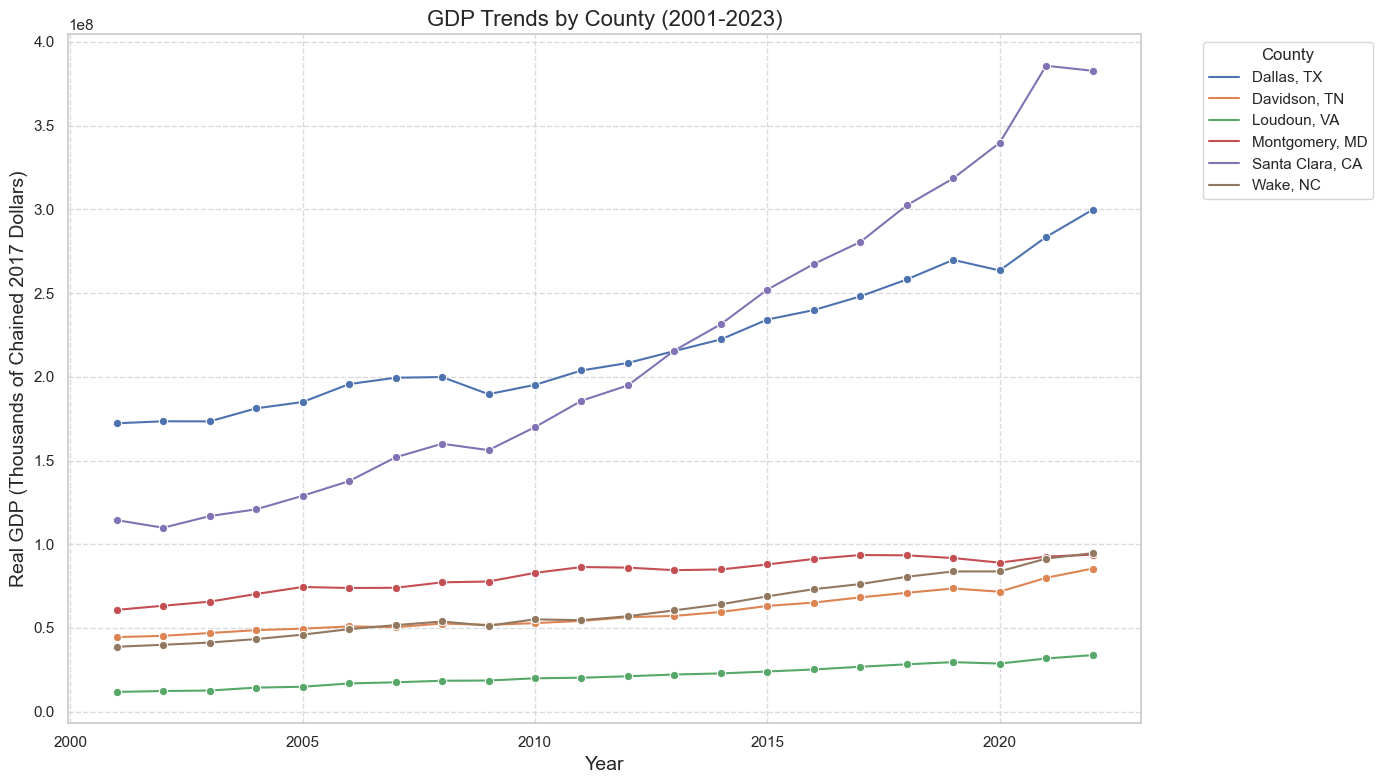

In [47]:
# Define the counties of interest
counties_of_interest = [
    "Loudoun, VA",
    "Fairfax, VA",
    "Montgomery, MD",
    "Santa Clara, CA",
    "Dallas, TX",
    "Davidson, TN",
    "Wake, NC"
]

# Filter data for the counties of interest
filtered_gdp_data = gdp_data[gdp_data["county_name"].isin(counties_of_interest)]

# Prepare the data for plotting
filtered_gdp_data = filtered_gdp_data[["county_name", "year", "real_gdp"]].sort_values(by=["county_name", "year"])

# Plot GDP trends by county
plt.figure(figsize=(14, 8))
sns.lineplot(
    data=filtered_gdp_data,
    x="year",
    y="real_gdp",
    hue="county_name",
    marker="o"
)

# Customize the plot
plt.title("GDP Trends by County (2001-2023)", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Real GDP (Thousands of Chained 2017 Dollars)", fontsize=14)
plt.grid(True, linestyle="--", alpha=0.7)
plt.legend(title="County", bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()


### Median Housing Cost by County Over Time

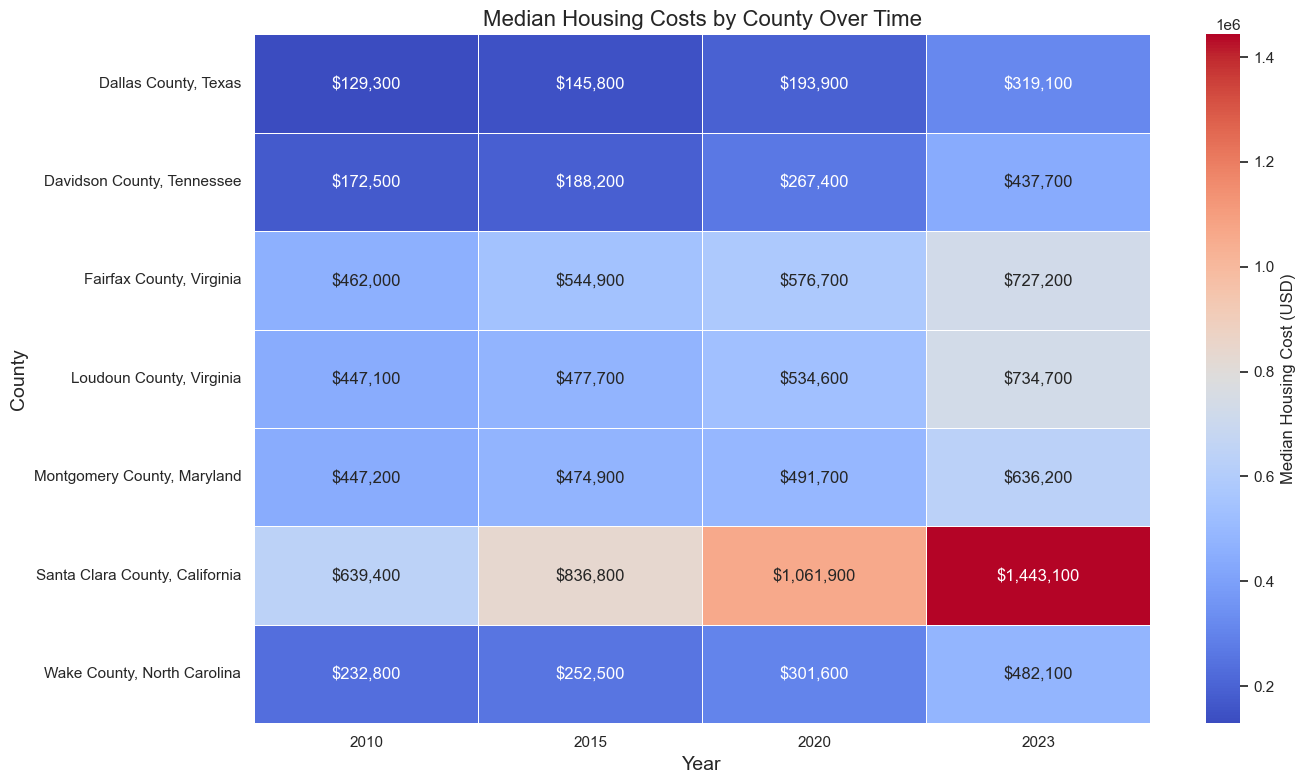

In [49]:
# Load the housing costs dataset
housing_costs = cleaned_dataframes["Housing_Costs"]

# Convert column names to lowercase
housing_costs.columns = housing_costs.columns.str.lower()

# Ensure 'median_value_dollars' is numeric
housing_costs["median_value_dollars"] = housing_costs["median_value_dollars"].str.replace(",", "", regex=True).astype(float)

# Filter only the counties of interest
counties_of_interest = [
    "Santa Clara County, California",
    "Montgomery County, Maryland",
    "Wake County, North Carolina",
    "Davidson County, Tennessee",
    "Dallas County, Texas",
    "Fairfax County, Virginia",
    "Loudoun County, Virginia"
]
housing_costs = housing_costs[housing_costs["county"].isin(counties_of_interest)]

# Pivot the data for heatmap format (rows: counties, columns: years)
housing_costs_pivot = housing_costs.pivot(index="county", columns="year", values="median_value_dollars")

# Create the heatmap
plt.figure(figsize=(14, 8))
ax = sns.heatmap(
    housing_costs_pivot,
    cmap="coolwarm",
    annot=True,
    fmt=".0f",
    linewidths=0.5,
    cbar_kws={"label": "Median Housing Cost (USD)"}
)

# Format the annotations as currency
for text in ax.texts:
    value = text.get_text().replace(",", "")  # Remove commas from the text
    text.set_text('${:,.0f}'.format(float(value)))  # Format as currency

# Add titles and labels
plt.title("Median Housing Costs by County Over Time", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("County", fontsize=14)
plt.tight_layout()
plt.show()



In [51]:
# Load and reshape establishments data
labor_stats_data = cleaned_dataframes["Labor_Stats"]
labor_stats_data.head()

,area_fips,own_code,industry_code,agglvl_code,year,qtr,annual_avg_estabs,annual_avg_emplvl,total_annual_wages,avg_annual_pay
0,48113,0,10,70,2020,A,81171,1667356,125000000000.00,75038.00
1,48113,1,10,71,2020,A,167,26129,2365181145.00,90520.00
2,48113,1,101,72,2020,A,1,6,559565.00,91983.00
3,48113,1,102,72,2020,A,166,26123,2364621580.00,90520.00
4,48113,1,1021,73,2020,A,69,8186,590807483.00,72169.00


### Number of Establishments by County Over Time

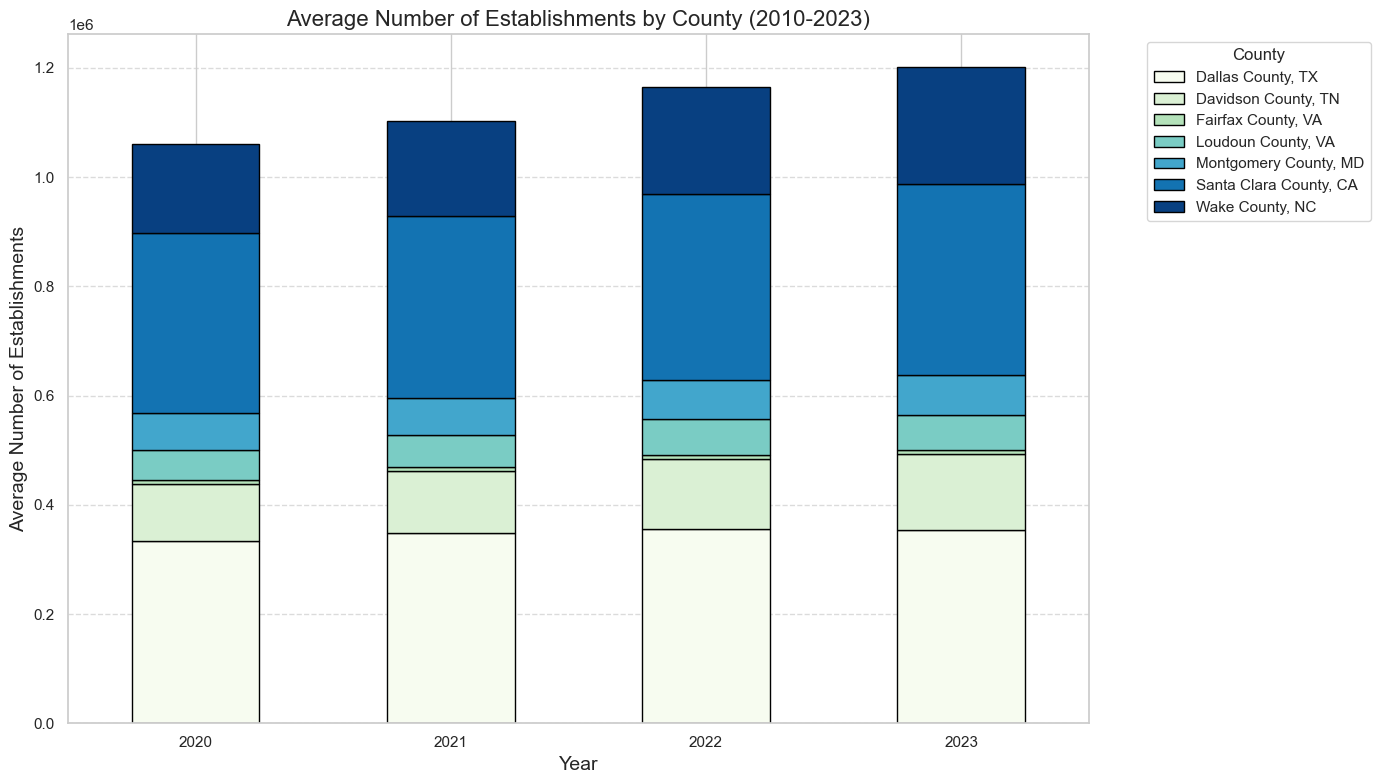

In [53]:
# Load establishments data
labor_stats_data = cleaned_dataframes["Labor_Stats"]

# Mapping FIPS codes to county names
selected_fips = {
    "48113": "Dallas County, TX",
    "47037": "Davidson County, TN",
    "51600": "Fairfax County, VA",
    "51107": "Loudoun County, VA",
    "24033": "Montgomery County, MD",
    "6085": "Santa Clara County, CA",
    "37183": "Wake County, NC",
}

# Filter data to include only selected counties and map FIPS codes to county names
filtered_data = labor_stats_data[
    labor_stats_data["area_fips"].astype(str).isin(selected_fips.keys())
].copy()
filtered_data["county"] = filtered_data["area_fips"].astype(str).map(selected_fips)

# Aggregate data by year and county for establishments
establishments_trends = (
    filtered_data.groupby(["year", "county"], as_index=False)["annual_avg_estabs"]
    .sum()
)

# Pivot data for stacked bar chart
establishments_pivot = establishments_trends.pivot(
    index="year", columns="county", values="annual_avg_estabs"
).fillna(0)

# Plot stacked bar chart
ax = establishments_pivot.plot(
    kind="bar", stacked=True, figsize=(14, 8), colormap="GnBu", edgecolor="black"
)

# Customize the plot
plt.title("Average Number of Establishments by County (2010-2023)", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Average Number of Establishments", fontsize=14)
plt.legend(title="County", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.xticks(rotation=0)
plt.tight_layout()

# Show the plot
plt.show()


### Loudoun County GDP Predictions

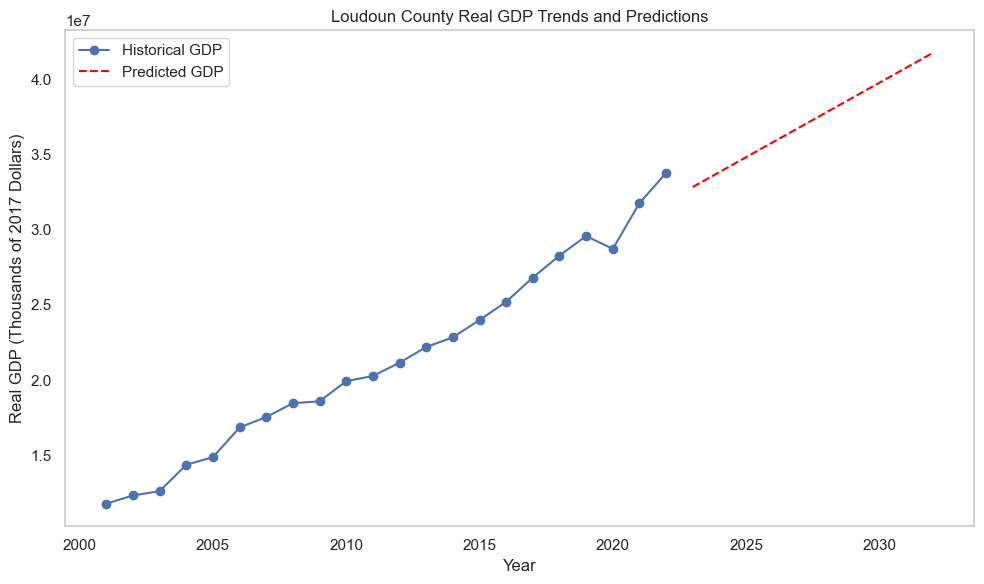

In [55]:
# Filter the dataset for Loudoun County
loudoun_gdp_data = gdp_data[gdp_data['county_name'].str.contains("Loudoun", case=False, na=False)]

# Proceed only if data is available
if not loudoun_gdp_data.empty:
    # Ensure the relevant column exists and is numeric
    if 'real_gdp' in loudoun_gdp_data.columns:
        # Extract years and GDP values for analysis
        years = loudoun_gdp_data['year'].values.reshape(-1, 1)
        real_gdp = loudoun_gdp_data['real_gdp'].values

        # Fit a linear regression model
        model = LinearRegression()
        model.fit(years, real_gdp)

        # Predict GDP for the next 10 years
        future_years = np.arange(years[-1][0] + 1, years[-1][0] + 11).reshape(-1, 1)
        future_gdp = model.predict(future_years)

        # Plot historical and predicted GDP
        plt.figure(figsize=(10, 6))
        plt.plot(loudoun_gdp_data['year'], real_gdp, label='Historical GDP', marker='o')
        plt.plot(future_years, future_gdp, label='Predicted GDP', linestyle='--', color='red')
        plt.xlabel('Year')
        plt.ylabel('Real GDP (Thousands of 2017 Dollars)')
        plt.title('Loudoun County Real GDP Trends and Predictions')
        plt.legend()
        plt.grid()
        plt.tight_layout()
        plt.show()
    else:
        print("'Real_GDP' column is missing in the dataset!")
else:
    print("No data found for Loudoun County!")


### Loudoun County Household Income Predictions

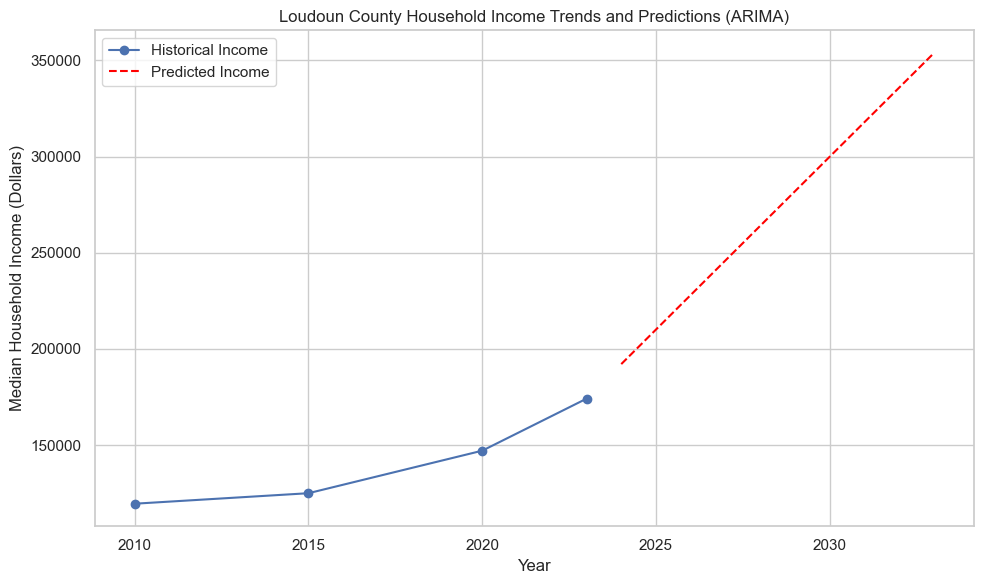

In [58]:
# Ensure the data is numeric
income_data['loudoun_county_virginia'] = pd.to_numeric(
    income_data['loudoun_county_virginia'].str.replace(",", "", regex=True), errors="coerce"
)

# Drop rows with missing or non-numeric data
loudoun_income_data_cleaned = income_data[['year', 'loudoun_county_virginia']].dropna()

# Fit the ARIMA model (order (p, d, q) - using (1, 1, 1) as a simple choice)
arima_model = ARIMA(loudoun_income_data_cleaned['loudoun_county_virginia'], order=(1, 1, 1))
arima_fit = arima_model.fit()

# Forecast for the next 10 years
forecast_steps = 10
forecast = arima_fit.forecast(steps=forecast_steps)

# Create future years for the forecasted data
future_years = np.arange(loudoun_income_data_cleaned['year'].max() + 1, loudoun_income_data_cleaned['year'].max() + forecast_steps + 1)

# Plot historical and forecasted income trends
plt.figure(figsize=(10, 6))
plt.plot(loudoun_income_data_cleaned['year'], loudoun_income_data_cleaned['loudoun_county_virginia'], label='Historical Income', marker='o')
plt.plot(future_years, forecast, label='Predicted Income', linestyle='--', color='red')
plt.xlabel('Year')
plt.ylabel('Median Household Income (Dollars)')
plt.title('Loudoun County Household Income Trends and Predictions (ARIMA)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
